In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# TODO

* Cambiar os valores de A para que tamen teñas negativos
* Nos quedamos con 2, 8, 16, 32, 256
* Tenemos que hacer lo de los ints
* Y cambiar el acceso a memoria


In [2]:
def leer_csv(filename: str) -> pd.DataFrame:

    pd.set_option('display.max_rows', None)
    df = pd.read_csv(filename, names=["Res", "D", "L", "Ck_per_Access"])
    df = df.drop('Res', axis=1)
    return df

In [10]:

def avg_of_best(df: pd.DataFrame) -> pd.DataFrame:

    data = []
    for d in df['D'].unique():
        for l in df['L'].unique():
            # Media geométrica de los 3 accesos más rapidos 
            ck_avg = df.loc[(df['D'] == d) & (df['L'] == l)] \
            	.nsmallest(3, 'Ck_per_Access')['Ck_per_Access'] \
            	.prod()**(1/3)
            data.append([d, l, ck_avg])
            
    return pd.DataFrame(data, columns=['D', 'L', 'Ck'])

In [8]:
# Saves all graphs
def graph_data(df: pd.DataFrame, type_of_graph: str) -> None:
    
    for d in df['D'].unique():
        fig, ax = plt.subplots()
        
        l_values = [str(i) for i in df.loc[df['D']==d]['L'].values]
        ck_values = list(df.loc[df['D']==d]['Ck'].values)
        
        ax.bar(l_values, ck_values) # Crea la grafica
        ax.set_ylabel('Ciclos de reloj por acceso')
        ax.set_title(f'Valor de D: {d}')
        
        # Guarda las graficas
        plt.savefig(f'data/graphs/graph_{type_of_graph}{d}.png')

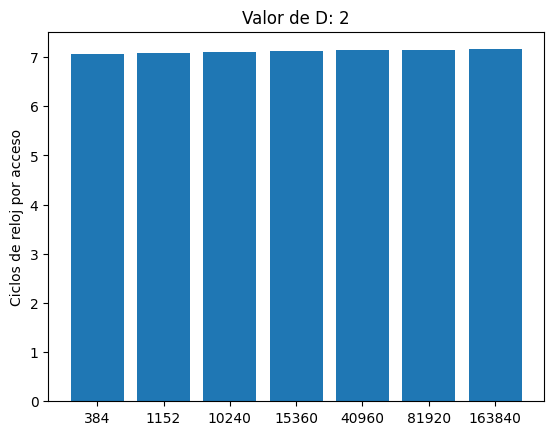

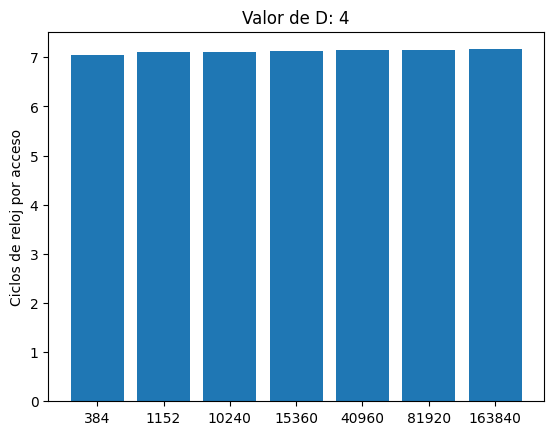

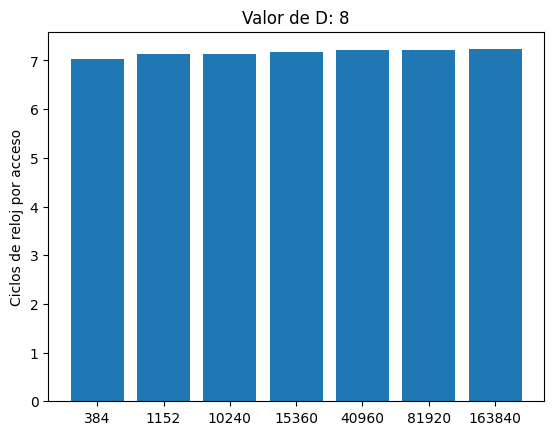

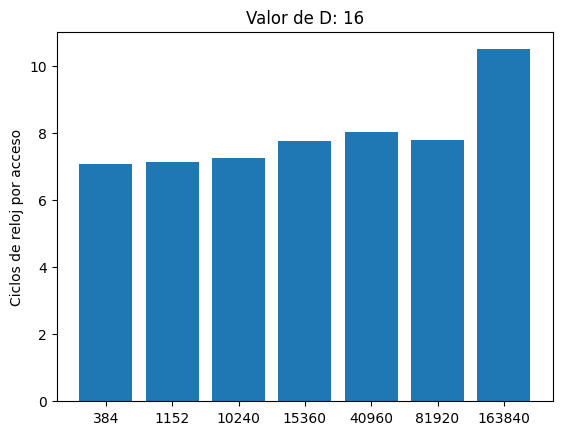

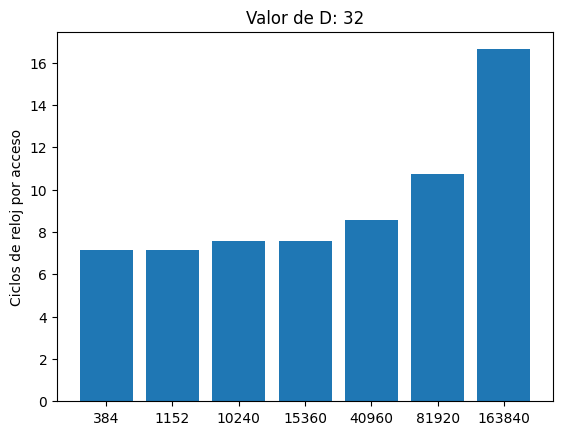

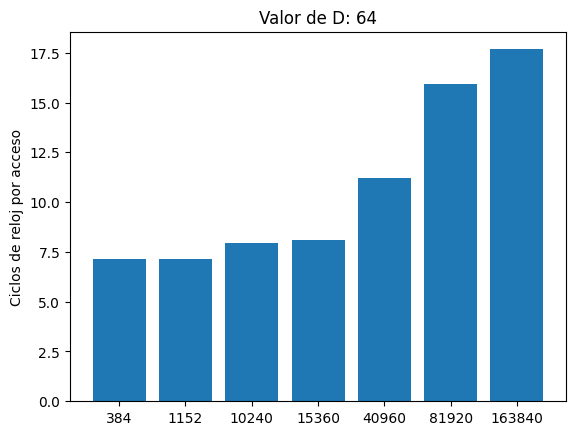

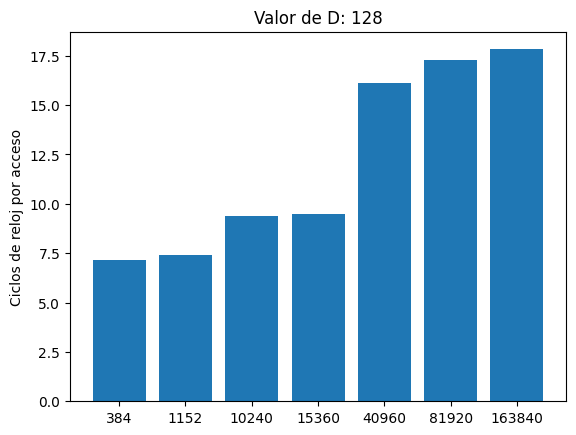

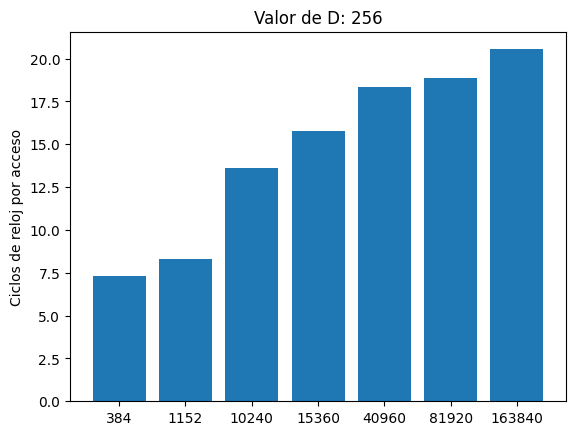

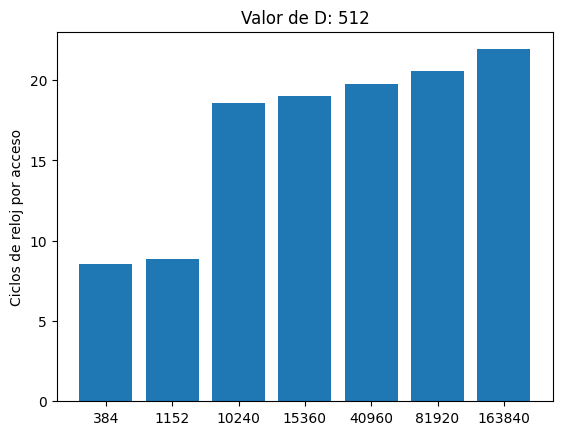

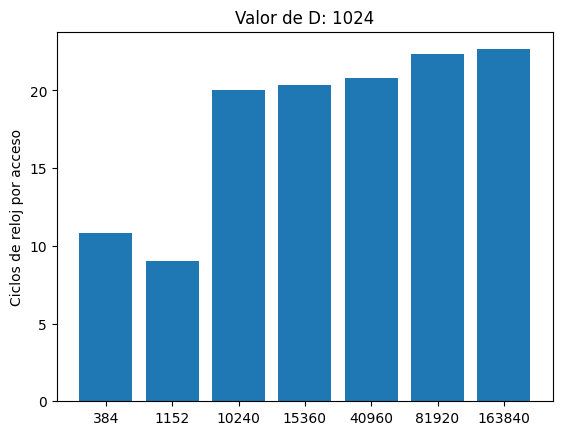

In [9]:
a = leer_csv('data/ck_double.csv')
a = avg_of_best(a)
graph_data(a, 'double')